###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2021 Semester 1

## Assignment 1: Pose classification with naive Bayes


**Student ID(s):** 
Chuen Ley Low: 1078133
Hoan Tran: 


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [16]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import accuracy_score, f1_score
import pickle 
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing

def preprocess():
    train_X = []
    train_Y = []
    train_file_path = "data/train.csv"
    test_file_path = "data/test.csv"
    
    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)
    
    train_X.append([float(x) for x in list(train_df.columns[1:])])
    train_Y.append(train_df.columns[0])
    
    for row in train_df.iterrows():
        temp = []
        for e in row[1][1:]:
            temp.append(e)
            
            
        train_X.append(temp)
        train_Y.append(row[1][0])
    
    test_X = []
    test_Y = []
    
    test_X.append([float(x) for x in list(test_df.columns[1:])])
    test_Y.append(test_df.columns[0])
    
    for row in test_df.iterrows():
        temp = []
        for e in row[1][1:]:
            temp.append(e)
            
            
        test_X.append(temp)
        test_Y.append(row[1][0])
    
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = preprocess()

In [36]:
# Pickle the training and testing lists
pickle.dump(train_X, open("train_X.pkl", "wb"))
pickle.dump(train_Y, open("train_Y.pkl", "wb"))
pickle.dump(test_X, open("test_X.pkl", "wb"))
pickle.dump(test_Y, open("test_Y.pkl", "wb"))

In [33]:
# This function should calculat prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model

def train():
    label_prob_dict = {}
    groups = {}
    for data, label in zip(train_X, train_Y):
        if label in groups:
            groups[label].append(data)
        else:
            groups[label] = [data]

    train_dict = {}
    
    for key in groups.keys():
        train_dict[key] = []
    
    for key in groups.keys():
        data = groups[key]
        num_attributes = len(data[0])
        num_instance = len(data)
        
        label_prob_dict[key] = num_instance / len(train_X)
        
        for i in range(num_attributes):
            total_sum = 0 
            for j in range(num_instance):
                if math.floor(data[j][i]) != 9999.0:
                    total_sum += float(data[j][i]) 
            
            mean = total_sum / num_instance
            
            diff_sum = 0
            
            for j in range(num_instance):
                if math.floor(data[j][i]) != 9999.0:
                    diff_sum += ((float(data[j][i]) - mean) ** 2)
                
            std_dev = math.sqrt(diff_sum / num_instance)
            
            train_dict[key].append((mean, std_dev))
            
    
    return train_dict, label_prob_dict, groups

train_dict, label_prob_dict, group_data = train()        

In [46]:
def GaussianFunction(x, mean, std_dev):
    x = float(x)
    base = 1 / (std_dev * math.sqrt(2 * math.pi))
    exponent = math.exp(-0.5 * ((x - mean)/std_dev) ** 2)
    return base * exponent

GaussianFunction(2.0, 1.0, 1.0)

0.24197072451914337

In [39]:
# This function should predict classes for new items in a test dataset (for the purposes of this assignment, you
# can re-use the training data as a test set)

def predict():
    predictions = []
    for i in range(len(test_X)):
        instance = test_X[i]
        prob_arr = []
        # Calculate the Gaussian Probability for each label
        for label in train_dict.keys():        
            prob = math.log(label_prob_dict[label], 2)
            for j in range(len(instance)):
                if math.floor(instance[j]) != 9999.0:
                    mean, std_dev = train_dict[label][j]
                    gaussian_prob = GaussianFunction(instance[j], mean, std_dev)
                    
                    if gaussian_prob != 0.0:
                        prob += math.log(GaussianFunction(instance[j], mean, std_dev), 2)
            prob_arr.append(prob)
        
        max_arg = np.argmax(prob_arr)
        predicted_label = list(train_dict.keys())[max_arg]
        predictions.append(predicted_label)
    
    print(predictions)
    return predictions

predictions = predict()

['bridge', 'childs', 'bridge', 'plank', 'downwarddog', 'bridge', 'bridge', 'bridge', 'childs', 'bridge', 'downwarddog', 'bridge', 'downwarddog', 'bridge', 'seatedforwardbend', 'childs', 'childs', 'mountain', 'childs', 'childs', 'seatedforwardbend', 'childs', 'childs', 'childs', 'childs', 'childs', 'childs', 'downwarddog', 'bridge', 'mountain', 'downwarddog', 'downwarddog', 'downwarddog', 'downwarddog', 'bridge', 'downwarddog', 'downwarddog', 'mountain', 'downwarddog', 'downwarddog', 'mountain', 'downwarddog', 'downwarddog', 'downwarddog', 'downwarddog', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'tree', 'tree', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'tree', 'tree', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'bridge', 'plank', 'plank', 'trianglepose', 'plank', 'plank', 'trianglepose', 'bridge', 'plank',

In [80]:
# This function should evaluate the prediction performance by comparing your model’s class outputs to ground
# truth labels

def evaluate():
    
    true_positives = {}
    true_negatives = {}
    false_positives = {}
    false_negatives = {}
    class_proportions = {}
    
    for key in train_dict.keys():
        true_positives[key] = 0
        true_negatives[key] = 0
        false_positives[key] = 0
        false_negatives[key] = 0
        class_proportions[key] = 0
    
    for i in range(len(test_Y)):
        
        # When predictions match actual
        if predictions[i] == test_Y[i]:
            true_positives[predictions[i]] += 1
            for key in train_dict.keys():
                if key != predictions[i]:
                    true_negatives[key] += 1
                    
        # When prediction does not match
        else:
            false_positives[predictions[i]] += 1
            false_negatives[test_Y[i]] += 1
            for key in train_dict.keys():
                if key != predictions[i] and key != test_Y[i]:
                    true_negatives[key] += 1
    
    # Micro Averaging 
    
    # Recall And Precision
    total_true_positives = 0
    total_false_neg = 0
    total_false_pos = 0
    for key in true_positives:
        total_true_positives += true_positives[key]
        total_false_neg += false_negatives[key]
        total_false_pos += false_positives[key]
    
    recall = total_true_positives / (total_true_positives + total_false_neg)
    precision = total_true_positives / (total_true_positives + total_false_pos)
    
    print(f"Micro Average Recall: {recall}")
    print(f"Micro Average Precision: {precision}")
    
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f"Micro Average F1 Score: {f1_score}")
    
    # Macro Averaging
    
    # Get the recall and precision for each class
    class_recall = {}
    class_precision = {}
    
    recall = 0
    precision = 0
    for key in true_positives.keys():
        class_recall[key] = true_positives[key] / (true_positives[key] + false_negatives[key])
        class_precision[key] = true_positives[key] / (true_positives[key] + false_positives[key])
        
        recall += class_recall[key]
        precision += class_precision[key]
    
    recall /= len(class_recall)
    precision /= len(class_precision)
    print("\n")
    print(f"Macro Average Recall: {recall}")
    print(f"Macro Average Precision: {precision}")
    
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f"Macro Average F1 Score: {f1_score}")
    
    # Weight Averaging
    
    # Get class proportions
    for instance in test_Y:
        if instance in class_proportions:
            class_proportions[instance] += 1
        else:
            class_proportions[instance] = 1
    
    recall = 0
    precision = 0
    for key in class_proportions:
        class_proportions[key] /= len(test_Y)
        
        recall += (class_proportions[key]) * (class_recall[key])
        precision += (class_proportions[key]) * (class_precision[key])
    
    print("\n")
    print(f"Weighted Average Recall: {recall}")
    print(f"Weighted Average Precision: {precision}")
    
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f"Weighted Average F1 Score: {f1_score}")   
    
    print(class_proportions)
    
evaluate()

Micro Average Recall: 0.7413793103448276
Micro Average Precision: 0.7413793103448276
Micro Average F1 Score: 0.7413793103448276


Macro Average Recall: 0.7415659340659341
Macro Average Precision: 0.71375
Macro Average F1 Score: 0.7273921394659594


Weighted Average Recall: 0.7413793103448276
Weighted Average Precision: 0.7570812807881774
Weighted Average F1 Score: 0.7491480271781102
{'bridge': 0.1206896551724138, 'childs': 0.11206896551724138, 'downwarddog': 0.15517241379310345, 'mountain': 0.25862068965517243, 'plank': 0.07758620689655173, 'seatedforwardbend': 0.07758620689655173, 'tree': 0.05172413793103448, 'trianglepose': 0.034482758620689655, 'warrior1': 0.04310344827586207, 'warrior2': 0.06896551724137931}


In [27]:
#Load in pickle for train_X

train_X = pickle.load(open("train_X.pkl", "rb"))
train_Y = pickle.load(open("train_Y.pkl", "rb"))

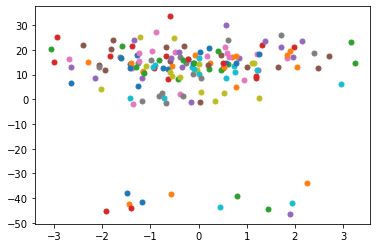

In [35]:
# Plot the the left wrist points for the classes {mountain, tree and trianglepose}
#For Left Wrist coordinates, we extract the the x and y coordinates

LEFT_WRIST_X = 6
LEFT_WRIST_Y = 17

# For Mountain
mountain_points = group_data["mountain"]

left_wrist_x = []
left_wrist_y = []
for row in mountain_points:
    left_wrist_x.append(row[LEFT_WRIST_X])
    left_wrist_y.append(row[LEFT_WRIST_Y])

for i in range(len(left_wrist_x)):
    if (math.floor(left_wrist_x[i]) != 9999.0 and math.floor(left_wrist_y[i]) != 9999.0):
        plt.plot(left_wrist_x[i], left_wrist_y[i], 'o', markersize=5)

plt.show()

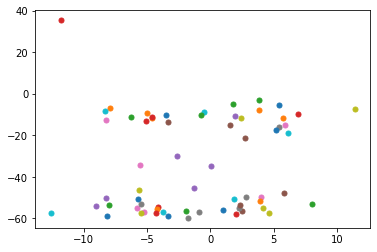

In [39]:
# For tree
tree_points = group_data["tree"]

left_wrist_x = []
left_wrist_y = []
for row in tree_points:
    left_wrist_x.append(row[LEFT_WRIST_X])
    left_wrist_y.append(row[LEFT_WRIST_Y])

for i in range(len(left_wrist_x)):
    if (math.floor(left_wrist_x[i]) != 9999.0 and math.floor(left_wrist_y[i]) != 9999.0):
        plt.plot(left_wrist_x[i], left_wrist_y[i], 'o', markersize=5)

plt.show()

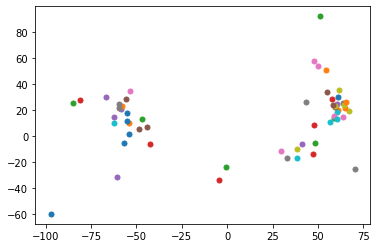

In [38]:
# For TrianglePose
triangle_points = group_data["trianglepose"]

left_wrist_x = []
left_wrist_y = []
for row in triangle_points:
    left_wrist_x.append(row[LEFT_WRIST_X])
    left_wrist_y.append(row[LEFT_WRIST_Y])

for i in range(len(left_wrist_x)):
    if (math.floor(left_wrist_x[i]) != 9999.0 and math.floor(left_wrist_y[i]) != 9999.0):
        plt.plot(left_wrist_x[i], left_wrist_y[i], 'o', markersize=5)

plt.show()

In [70]:
# KDE Implementation for calculating our probabilities
#def calculate_KDE_probability(value):
    
def predict_with_KDE(): 
    predictions = []
    
    for instance in test_X:
        prob_arr = []
        for label in train_dict:
            gaussian_KDE_prob = math.log(label_prob_dict[label], 2)
            for i in range(len(instance)):
                value = instance[i]
                if math.floor(value) == 9999.0:
                    continue
                    
                total_prob = 0
                count = 0
                train_rows = group_data[label]
                for train_instance in train_rows:
                    if math.floor(train_instance[i]) != 9999.0:
                        total_prob += GaussianFunction(value, train_instance[i], std_dev = 10)
                        count += 1
                        
                avg_prob = total_prob / count
                if (avg_prob > 0):
                    gaussian_KDE_prob += math.log(avg_prob, 2)
            
            prob_arr.append(gaussian_KDE_prob)
            
        max_arg = np.argmax(prob_arr)
        predicted_label = list(train_dict.keys())[max_arg]
        predictions.append(predicted_label)

    return predictions
                
KDE_predictions = predict_with_KDE()           

In [71]:
accuracy_score(test_Y, KDE_predictions)

0.7758620689655172

## Questions 


If you are in a group of 1, you will respond to **two** questions of your choosing.

If you are in a group of 2, you will respond to **four** questions of your choosing.

A response to a question should take about 100–250 words, and make reference to the data wherever possible.

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer should be submitted separately as a PDF.

### Q1
Since this is a multiclass classification problem, there are multiple ways to compute precision, recall, and F-score for this classifier. Implement at least two of the methods from the "Model Evaluation" lecture and discuss any differences between them. (The implementation should be your own and should not just call a pre-existing function.)

### Q2
The Gaussian naıve Bayes classifier assumes that numeric attributes come from a Gaussian distribution. Is this assumption always true for the numeric attributes in this dataset? Identify some cases where the Gaussian assumption is violated and describe any evidence (or lack thereof) that this has some effect on the classifier’s predictions.

### Q3
Implement a kernel density estimate (KDE) naive Bayes classifier and compare its performance to the Gaussian naive Bayes classifier. Recall that KDE has kernel bandwidth as a free parameter -- you can choose an arbitrary value for this, but a value in the range 5-25 is recommended. Discuss any differences you observe between the Gaussian and KDE naive Bayes classifiers. (As with the Gaussian naive Bayes, this KDE naive Bayes implementation should be your own and should not just call a pre-existing function.)

### Q4
Instead of using an arbitrary kernel bandwidth for the KDE naive Bayes classifier, use random hold-out or cross-validation to choose the kernel bandwidth. Discuss how this changes the model performance compared to using an arbitrary kernel bandwidth.

### Q5
Naive Bayes ignores missing values, but in pose recognition tasks the missing values can be informative. Missing values indicate that some part of the body was obscured and sometimes this is relevant to the pose (e.g., holding one hand behind the back). Are missing values useful for this task? Implement a method that incorporates information about missing values and demonstrate whether it changes the classification results.

### Q6
Engineer your own pose features from the provided keypoints. Instead of using the (x,y) positions of keypoints, you might consider the angles of the limbs or body, or the distances between pairs of keypoints. How does a naive Bayes classifier based on your engineered features compare to the classifier using (x,y) values? Please note that we are interested in explainable features for pose recognition, so simply putting the (x,y) values in a neural network or similar to get an arbitrary embedding will not receive full credit for this question. You should be able to explain the rationale behind your proposed features. Also, don't forget the conditional independence assumption of naive Bayes when proposing new features -- a large set of highly-correlated features may not work well.